In [30]:
#VERİ SETİ HİKAYESİ VE YAPISININ İNCELENMESİ

In [2]:
import seaborn as sns
import pandas as pd
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [207]:
# VERİ SETİNİN HİKAYESİ#
#METHOD: NASNAIN YAYINLADIGI GALAXSİ KESFİ VERİ. GEZEGENİN BULUNMA SEKLİNİ 
#NUMBER:KAC GEZEGEN OLDUGU
#ORBİTAL: YÜRUNGE DÖNEMİ
#MASS: KÜTLESİ
#DİSTANCE :UZAKLIK
#YEAR: BULUNMA YILI

#ONCE VERİ SETİNİN YEDEGİNİ AL.... 
yedek = planets.copy()

In [4]:
planets.info() # veri setinin yapısal bilgileri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [209]:
planets.dtypes # sadece degişkenlerin bilgilerine ulasmak istersek

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [210]:
planets.method = pd.Categorical(planets.method) #kategori deşitirme işlemi

In [ ]:
planets.dtypes

In [212]:
#VERİ SETİN BETİMLENMESİ

In [ ]:
import seaborn as sns
import pandas as pd
planets = sns.load_dataset("planets")
planets.head()

In [ ]:
planets.describe().T #YORUMLANABİLİR HALE GETİRDİK
#Descirbe fonksiyonu eksik gözlemleri göz ardı eder, 
 #katagorik degiskenleri  dısarıda bırakır

In [ ]:
planets.describe(include = "all").T #include "all" fonksiyonu tüm degişkenleri gösterir

In [ ]:
#EKSİK DEGERLERİN GİDERİLMESİ

In [ ]:
#Veri tablusunda hic eksik gözlem var mı ? true var demek.
planets.isnull().values.any()

In [ ]:
#Nerede ne kadar eksik deger var toplamını göster
planets.isnull().sum()

In [55]:
#EGER BU EKSİK DEGERLERİN İŞLEMLER SIRASINDA BİR SIKINTI CIKARMAMASINI İSTIYORSAK BUNUN ICIN TUM NULL DEGERLERE 0 ATAYABİLİRİZ
planets["orbital_period"].fillna(0, inplace = True) #gözlemnediği üzere orbital periyotta eksik veri giderildi.
planets.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [56]:
#Eger eksik degerlrin tamamı ortalam gibi 0 gibi degereri le atama işelmi de yapılabilir.
#fakat burda cokdıkkatlı olmak gerekir. Hasssa bir konu

In [63]:
planets["mass"].fillna(planets.mass.mean(), inplace = True)
planets.isnull().sum()  #"mass" degeri de sıfır oldu ekssık  elemean kalmadı cunku ortalama atadık

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [64]:
#EGER TÜM EKSİK DEGERLERİ GİDERMEK İSTERSEK NE YAPACAZZ
planets.fillna(planets.mean(), inplace = True) #BU SEKİLDE YAZICAZ
planets.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [65]:
#TABLOMUZ YAPISI BOZULDU. ŞİMDİ YAPTIGIMZ İŞLEMLERİ GERİ ALALIM. yedek almadıgımz için yarra yedik 

In [77]:
#KATEGORİK DEGİŞKENLER , SAYILARI, FREKANSLARI 
import seaborn as sns
import pandas as pd
planets = sns.load_dataset("planets")

In [79]:
planets.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [83]:
kat_df = planets.select_dtypes(include = ["object"])
kat_df.head()    #tablomuzda ki kategorik degskeni sectik

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [86]:
kat_df.method.unique() # asagıda kategorik degişkenlerin listesi mevcut

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [93]:
kat_df["method"].value_counts() # boyle yazarsak kategirk degiskenlerin ayrı ayrı detaylarına ulasıyoruz. frekanslarına

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [92]:
kat_df["method"].value_counts().count() # eger boyle yazarsak toplam kategorik degişken sayısına ulasırz

10

In [1]:
df_num = planets.select_dtypes(include = ["float64","int64"])
df_num.head()

NameError: name 'planets' is not defined

In [106]:
kat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [112]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [116]:
print("ORTALAMA: "+ str(df_num["distance"].mean()))
print("SAYISI: "+ str(df_num["distance"].count()))
print("EN BUYUK DEGERİ: "+ str(df_num["distance"].max()))
print("MİNUMUM DEGERİ: "+ str(df_num["distance"].min()))
print("STANDART SAPMASI: "+ str(df_num["distance"].std()))
print("MEDYANI: "+ str(df_num["distance"].median()))

ORTALAMA: 264.06928217821786
SAYISI: 808
EN BUYUK DEGERİ: 8500.0
MİNUMUM DEGERİ: 1.35
STANDART SAPMASI: 733.1164929404422
MEDYANI: 55.25


In [164]:
import seaborn as sns
import pandas as pd
import numpy as np
yedek = sns.load_dataset("diamonds")
dıamonds = yedek.copy()
dıamods.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [165]:
dıamods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [166]:
dıamods.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [ ]:
dıamods.head()

In [ ]:
dıamods["cut"].value_counts()

In [172]:
dıamonds["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [173]:
#ORDİNAL TANIMLAMA
from pandas.api.types import CategoricalDtype
dıamonds.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [174]:
df.cut = dıamonds.cut.astype(CategoricalDtype(ordered = True))

In [175]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [176]:
cut_kategori = ["Fair", "Good" ,"Very Good", "Premium" , "Ideal" ]

In [177]:
df.cut = dıamonds.cut.astype(CategoricalDtype(categories = cut_kategori, ordered = True))

In [178]:
df.cut.head(1)  #şimdi ince detay düzeldi.

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [179]:
#VERİ SETİNİN HİKAYESİ BİLMEDEN VERİ SETİNİ GÖRESELLESTİREMEYİZ..

In [180]:
#SUTUN GRAFİK OLUSTURMA

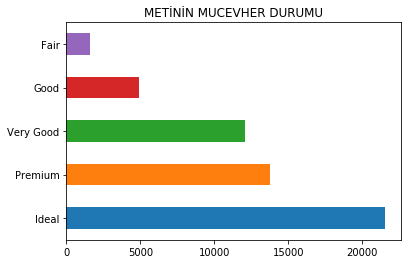

In [198]:
dıamods["cut"].value_counts().plot.barh().set_title("METİNİN MUCEVHER DURUMU"); #TUM DEGİŞKENLER İCİN AYRI AYRI HAZIRLAYABİLİRİZ.
#GRAFİGE BASLIK İSİM BİLGİLENDİRME NOTU EKLEMEK İÇİN set_title kullanıyoruz.

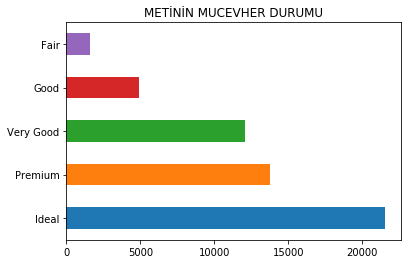

In [199]:
#eger kod satırı uzarsa noktalardan sonra bir alt satıra alabiliriz. 
#fakat kod satıırnın basına ve notkalı virgulden once parenteze alırız.asagıdaki gibi

(dıamods["cut"]
 .value_counts()
 .plot.barh()
 .set_title("METİNİN MUCEVHER DURUMU")); 

In [200]:
#yukarıdaki görsellestirmeler pandas aracılıgyla aşagıda ise seaborn kütüphanesi ile yapılanlar mevcut

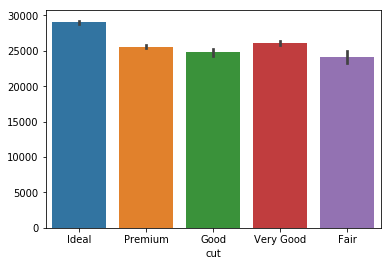

In [230]:
sns.barplot(x= "cut", y= dıamods.cut.index , data= dıamods); # asagıdaki grafikte karısık vrei mevcut. kucukten buyuge sen düzelt

In [239]:
import seaborn as sns
import pandas as pd
from pandas.api.types import CategoricalDtype
dıamods = sns.load_dataset("diamonds")
df = dıamods.copy()
cut_kategoriler= ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


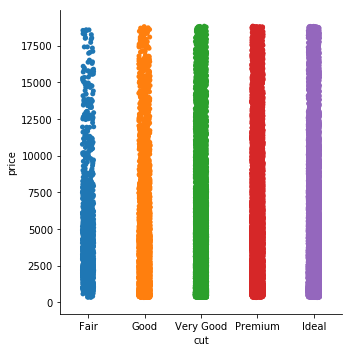

In [240]:
sns.catplot(x="cut",y="price",data= df); #caprazlama

In [241]:
#ŞİMDİ YUKARIDAKİ GRAFİGE BİR BOYUT DAHA EKLEYELİM. BUNU huge argumanı ile yaparız. aşagıda

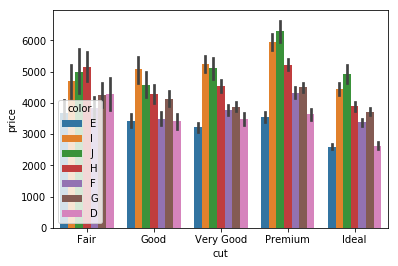

In [242]:
sns.barplot(x="cut", y= "price", hue= "color", data = df); #AŞAGIDAKİ GRAFİKTE SİYAH CİZGİLER STD DİR

In [245]:
df.groupby(["cut", "color"])["price"].mean() #dogrulama

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [ ]:
#histogram ve yogunluk grafikleri sayılsal verileri dagılımı göstermek için kullanılır

In [36]:
import seaborn as sns
import pandas as pd
from pandas.api.types import CategoricalDtype
dıamods = sns.load_dataset("diamonds")
df = dıamods.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


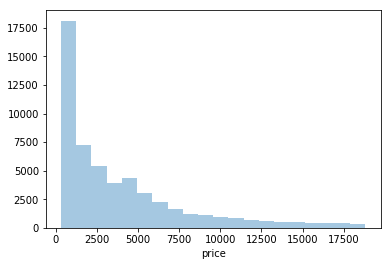

In [37]:
sns.distplot(df.price, bins= 20,kde= False);# buradaki bins degeri elle degistirebilirz. 

In [38]:
#şimdi yukarıda kii grafigebirde olasılık yogunluk fonksiyonu ekleyelim. kde true yapmıs olduk

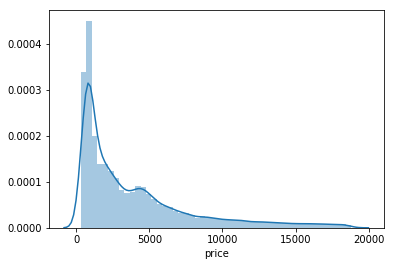

In [39]:
sns.distplot(df.price); # dikkat edersek seaborn y eksenni yeniden çlceklendirdi

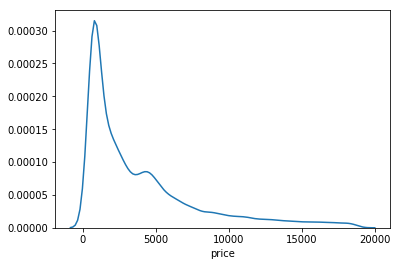

In [40]:
#eger sadece yogunluk grafiğini görmek istersek hist isımli argumanı folse yaparız.

sns.distplot(df.price, hist= False);

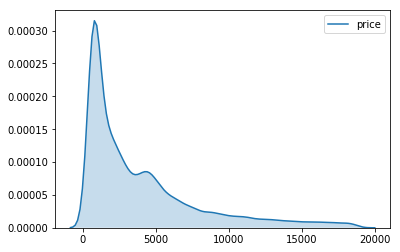

In [41]:
#EGER YOGUNLUK GRAFİGİNİN ALTINI DOLDURMAK, BOYAMAK İSTERSEK kdeplot argumanı cagırz
sns.kdeplot(df.price, shade= True);

## ÇAPRAZLAMALAR

In [42]:
#ŞİMDİ CUT ARGUMANI İLE PRİCE AGUMANINI YGUNKUK GRAFİ ÜZERİNDE CAPRAZLAYALIM.. hue boyut ekleme fonksiyonu 
#Facetgrid ise grafik üzerine eklenen boyutları bölerek göstrmek için kullanılır

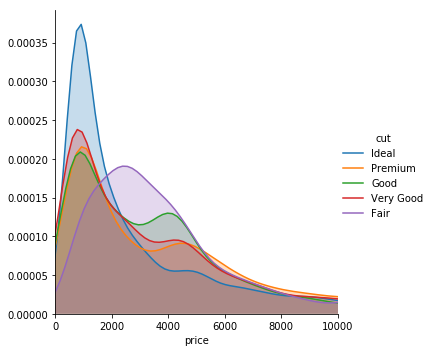

In [43]:
(sns
 .FacetGrid(df,
          hue = "cut",
           height = 5,
          xlim = (0,10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend() #cut kategorisinin nilgisini eklemek için kullandık
);

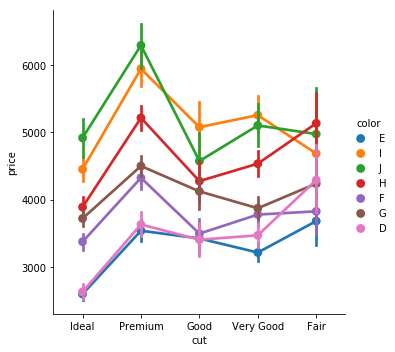

In [46]:
sns.catplot( x = "cut", y = "price" , hue = "color", kind = "point" , data = df); #noktalardan olusan bir catplot

In [23]:
 #BURADAKI VERİ SETİ BİR RERSTORANDA Kİ OLAYLARDAN CIKARTILMISTIR.
    #veri setinin hikayesini bil
import seaborn as sns 
import pandas as pd
tips = sns.load_dataset("tips")
tp = tips.copy()
tp.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
#acaba yemek yiyen grupda sigara içen lerin olup olmaması bahsis durumunu nasıl etkiliyordur.
#acaba yemek yiyenlerin cinsiyeti bahsis durumunu etkiliyor mu..
#daha bir sürü soru turetebiliriz..


In [ ]:
#kategorik degiskenlerin frekanslarını bulalım

In [24]:
tp["sex"].value_counts() # yemek yiyen 157 erkek 87 kadın var deriz

Male      157
Female     87
Name: sex, dtype: int64

In [3]:
tp["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [4]:
tp["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [5]:
tp["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [6]:
#boxplot ile kullancz

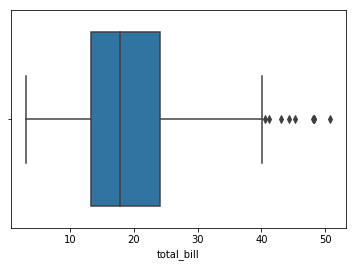

In [7]:
sns.boxplot(x= tp["total_bill"]);

In [8]:
#eger bugrafiği dikey sekilde yapmak istersek aşagıdaki gibi yazarız..

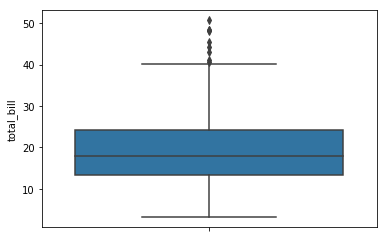

In [9]:
sns.boxplot(x= tp["total_bill"], orient = "v"); #bu sekilde yzarsak grafik dikey olusur.

In [10]:
#CAPRAZALAMALAR 

In [11]:
tp.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


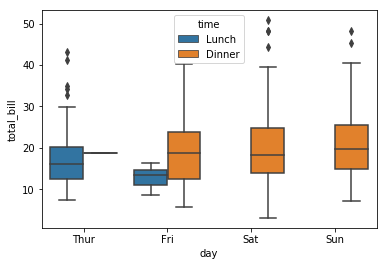

In [12]:
#SORU HANGİ GÜNLER DAHA FAZLA KAZANIYORUZ hangi ögünde daha cok kazanıyoruz
sns.boxplot( x ="day", y =  "total_bill", hue = "time", data = tp);

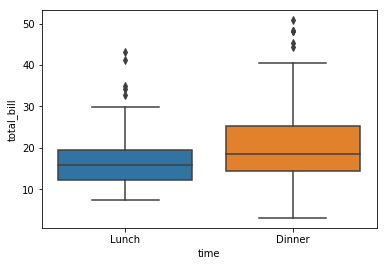

In [13]:
#HANGİ ÖGÜN DAHA COK KAZANIYORUZ
sns.boxplot( x ="time", y =  "total_bill", data = tp);

In [14]:
# VİOLİN GRAFİĞİ 

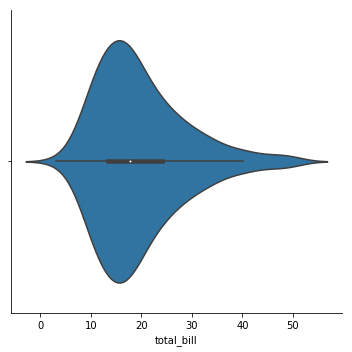

In [16]:
sns.catplot( x= "total_bill", kind = "violin", data = tp); #toplam ucretin violin grffiği.

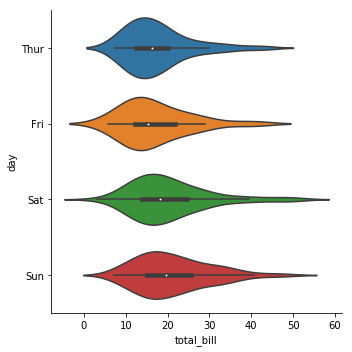

In [17]:
sns.catplot( x= "total_bill", y = "day" , kind = "violin", data = tp)

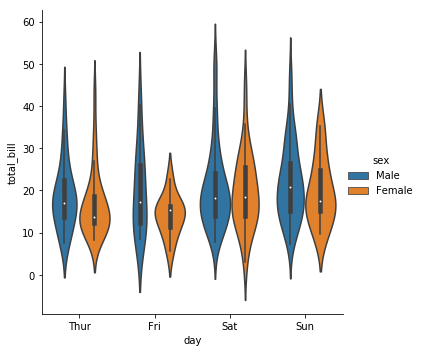

In [19]:
sns.catplot( y = "total_bill", x = "day" , hue = "sex", kind = "violin", data = tp)

In [21]:
#KORELASYON GRAFİKLERİ
# AYNI ANDA İKİ SAYISAL DEGİŞKENİN BİLGİLERİ İNCELİCEZ.

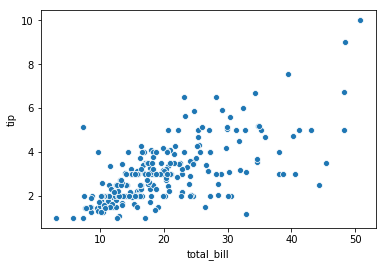

In [31]:
sns.scatterplot(x ="total_bill",y= "tip" , data=tp)

In [ ]:
#şimdi bu grafige birde time degiskenin ekleyelim 3 uncu boyut olarak

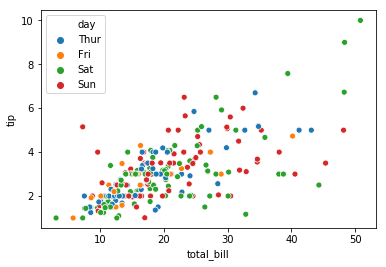

In [34]:
sns.scatterplot(x ="total_bill",y= "tip" , hue = "day", data=tp)

In [35]:
#ŞİMDİ STYLE İSİMLİ BİR ARGUMNALA BİRAZ DAHA DETAY EKLEYELİM 

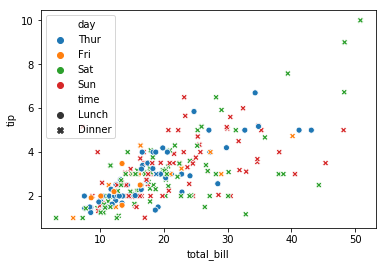

In [37]:
sns.scatterplot(x ="total_bill",y= "tip" , hue= "day", style = "time", data=tp);

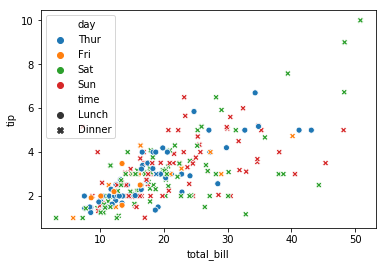

In [42]:
sns.scatterplot(x ="total_bill",y= "tip" , hue= "day", style = "time", data=tp);
#kategirk bir degişken eklemek istersek

In [43]:
##BURADA ÇAPRAZLAMA BİTTİ.
#ŞİMDİ İKİ DEGİŞKEN ARASINDA DOGRUSAL İLİŞKİYE BAKALIM.

In [49]:
import seaborn as sns
import matplotlib.pyplot as py

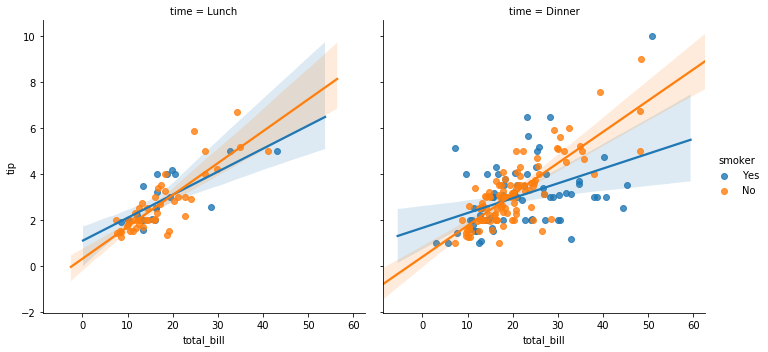

In [57]:
sns.lmplot(x = "total_bill", y = "tip", hue= "smoker", col = "time", data =tp); 
#BURADA ÖGLE VE AKSAM YEMEKLERİNDE SİGARA İÇEN VEN İÇMEYENLERİN ÖDEDİĞİ BİLL İLE TİP ARASINDAKİ DOGRUSAL İLİŞKİ


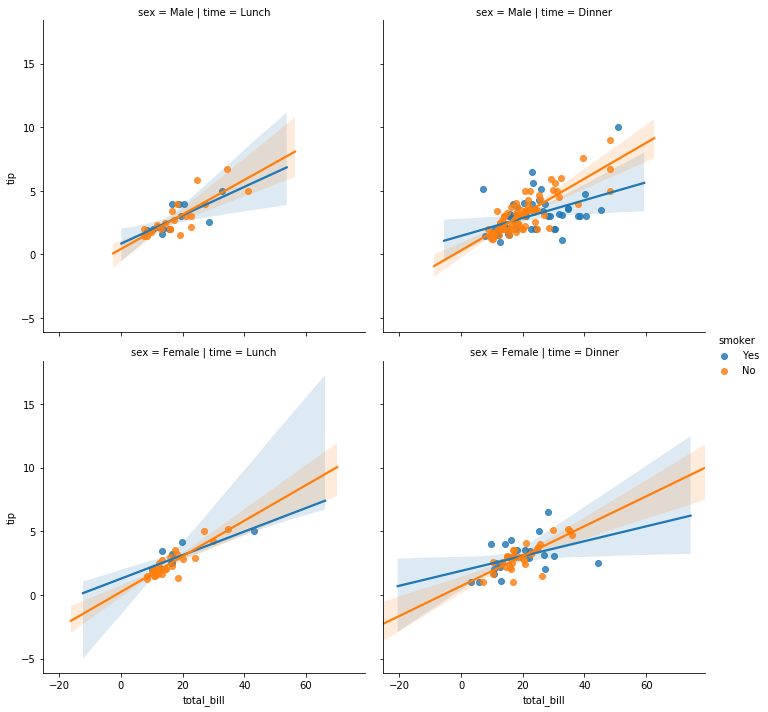

In [59]:
#ŞİMDİ 4 ÜNCÜ BİR BİLGİ DAHA EKLEYELİM. 
sns.lmplot(x = "total_bill", y = "tip", hue= "smoker", col = "time", row= "sex", data =tp);

In [60]:
#şimdi yeni bir veri import edelim ve onun üzerinde scaterplot fonksiyonun kllanalım

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
ir = iris.copy()
ir.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [2]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


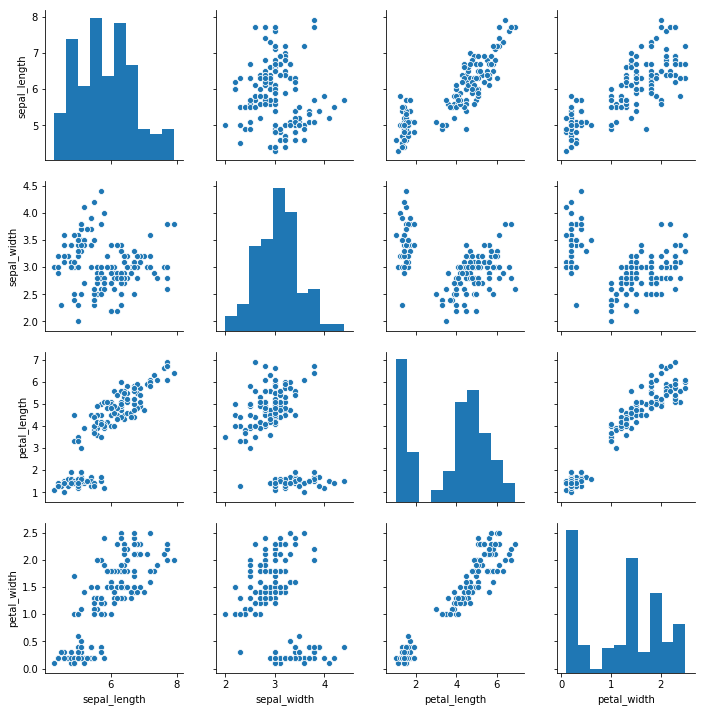

In [4]:
sns.pairplot(ir);
#SCOTER PLOT GÖRSELLERİNDE YANİ SAÇILIM GRAFİKLERİNDE DEGİŞKENLER ARASINDAKİ İLİŞKİ BİR TOZ BULUTU SEKLINDEYSE,
# VEYA YAPISAL BİR FORMU YOKSA O DEGİŞKENLER ARASINDA BİR İLİŞKİ YOK DEMEKTİR.
#DİĞER ÖNEMLİ BİR BİLGİ İSE, EGER GÖZLEM NOKTALARI BİRBİNDE FARKLI KÖSELERDE KUMELENİYORSA
#"ÇAPRAZLAMA DURUMUNDA GÖREBİLECEGİMİZ BAZI ALTI GRUPLAR VARDIR" DEMEKTİR. GÖZ ONUNDE BULUNDURULMASI GEREKİR.

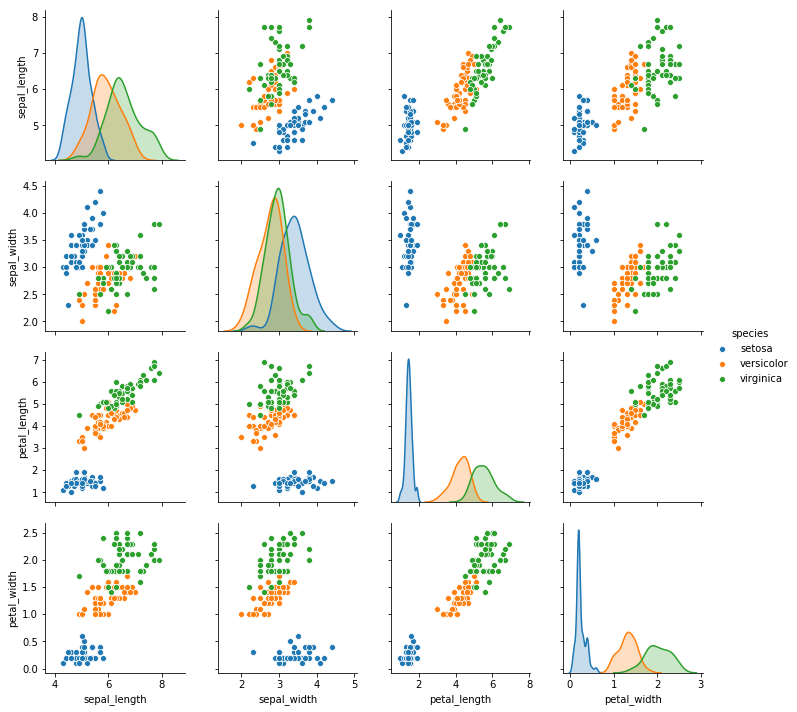

In [7]:
#BURADA YENİ BİR BOYUT EKLEMEMİZ GEREKİRSE 
sns.pairplot(ir, hue= "species");

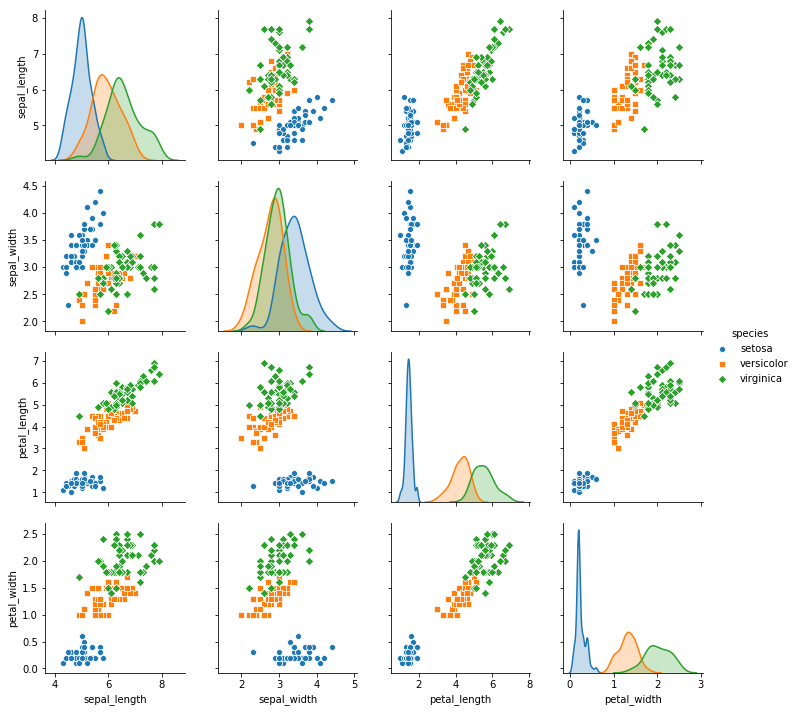

In [8]:
#eger yukarıdai grafiklerde markeers ların şeklini degiştirmke isterek
sns.pairplot(ir, hue= "species", markers = ["o","s","D"]); #markers fonksiyonu ile yapabiliriz. aşagıdaki gibi 
#bu işaretler pair plat fonksiyonun içinde belirtilmiştir.

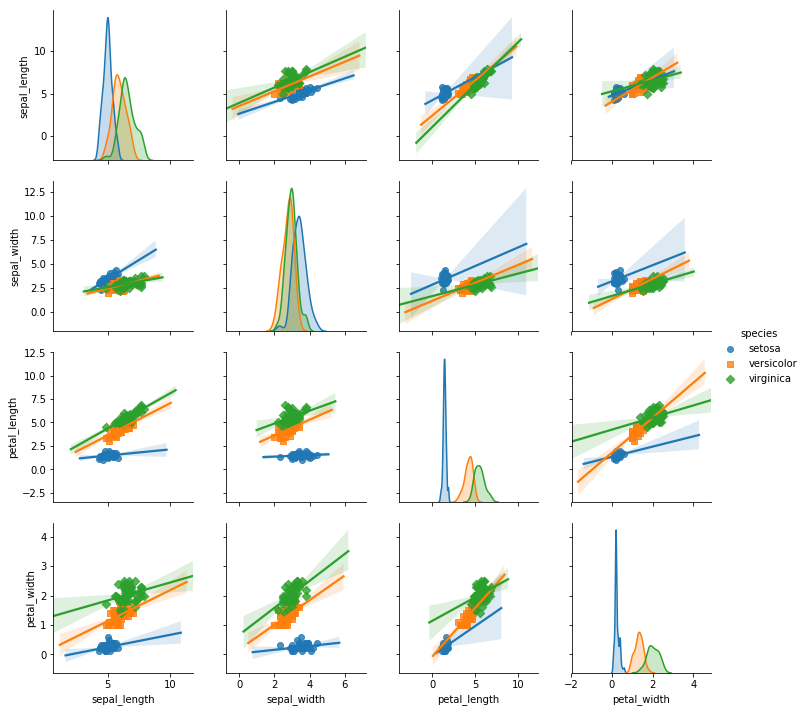

In [9]:
sns.pairplot(ir, hue= "species",kind = "reg", markers = ["o","s","D"]); # kind argumanı ile fonsiyona  bir dogru ekleyebilirz.

In [10]:
#ISI HARİTASI

In [38]:
import pandas as pd;
import seaborn as sns;
flight = sns.load_dataset("flights");
fl = flight.copy();
fl.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [13]:
fl.shape

(144, 3)

In [15]:
fl["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [39]:
fl = fl.pivot("month","year","passengers")

In [40]:
fl

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


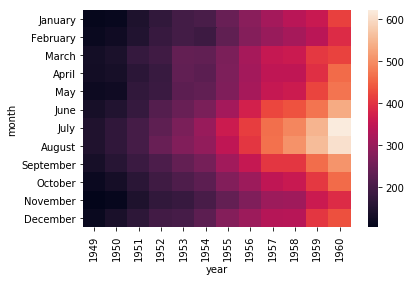

In [42]:
sns.heatmap(fl);

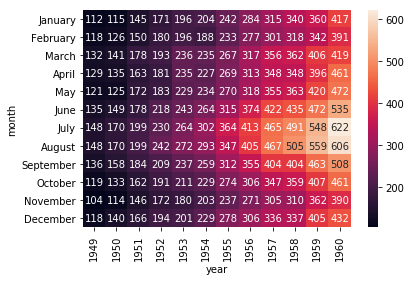

In [43]:
#EGER İLGİLİ HÜCRELERİN İÇİNDE TEMSİL ETTİKLERİ SAYILARDA GÖZLEMLENMEK İSTENİRSE 
sns.heatmap(fl, annot=True, fmt="d"); #annot ve  fmt argümanlarını kullanırız.

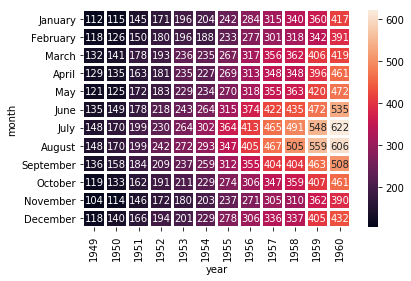

In [45]:
#EGER RAKAMLAR KARIISYOR DERSEK DE HÜCRELER ARASINA BOSLUKLAR DA KOYABİLİRİZ
sns.heatmap(fl, annot=True, fmt="d", linewidths = 2);

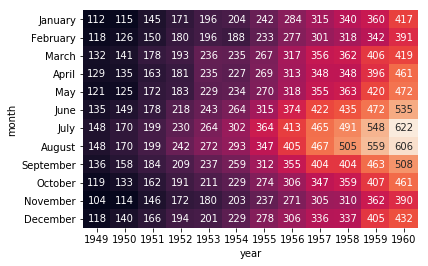

In [46]:
#EGER GRAFİGİN SAĞ  TARAFINDAKİ BARI KALDRMAK İSTERSEK AMA TAVSİYE EDİLMEZ
sns.heatmap(fl, annot=True, fmt="d", cbar= False);

In [ ]:
#ÇİZGİ GRAFİK YÖNTEMİ 

In [75]:
import pandas as pd;
import seaborn as sns;
fmri = sns.load_dataset("fmri");
fm = fmri.copy()
fm.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [58]:
fm.shape

(1064, 5)

In [60]:
fm["signal"].describe() #betimleyelim

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [64]:
fm.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [65]:
fm.groupby("signal").count() # dikkat ederseniz 1064 tane farklı sinyal degeri var.

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
-0.176453,1,1,1,1
-0.169312,1,1,1,1
-0.160821,1,1,1,1
-0.159772,1,1,1,1


In [67]:
fm.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


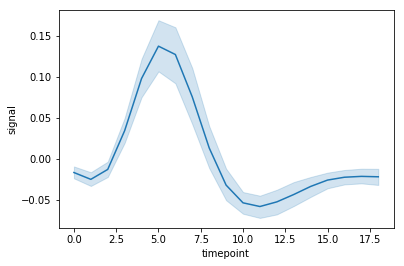

In [72]:
sns.lineplot( x = "timepoint", y = "signal", data = fm);

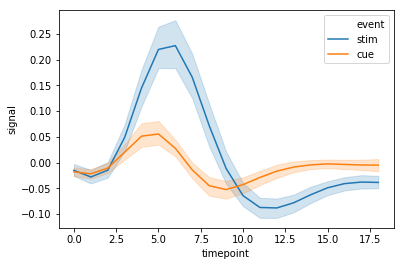

In [73]:
sns.lineplot( x = "timepoint", y = "signal", hue= "event", data = fm);

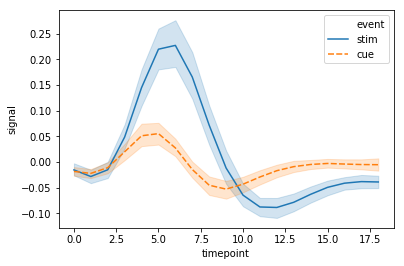

In [77]:
sns.lineplot( x = "timepoint", y = "signal", hue= "event", style = "event", data = fm);

#EGER ÇZİGLERE STİL EKLEMEK İSTERSEK
#style argumanı kullanırız.

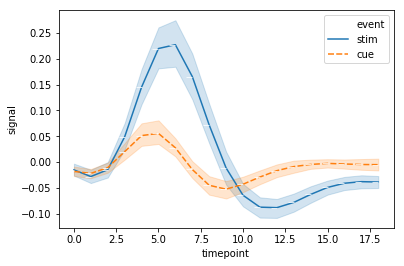

In [81]:
#ORTALAMA NOKTALARINI İŞARETLEYİM DAHA BELİRGİN BİR HALE GETİRELİM. 

sns.lineplot( x = "timepoint",
             y = "signal", 
             hue= "event", 
             style = "event", 
             marker = False,
             dashes = True,
             data = fm);


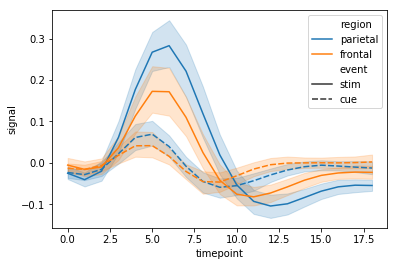

In [86]:
sns.lineplot( x = "timepoint",
             y = "signal", 
             hue= "region",
             style = "event",
             data = fm);

In [87]:
#BASİT ZAMAN SERİSİ GRAFİGİ

In [88]:
#aNAKONDA İÇİNDE YER ALMAYAN KUTUPAHNEYİ KULLANMAK İÇİN ÖNCE İNDRİRMEMZ LAZIM ONU DA !pip install fonksiyonu ile yaparız

!pip install pandas_datareader
import pandas_datareader as pdr


In [89]:
#TESLA İN BORSADAKİ HİSSE SENEDİ DEGERLERİNİ VERİ OLARAK İNDRCEZ

In [105]:
ap = pdr.get_data_yahoo("TSLA", start = "2015-01-01", end = "2019-12-30");

In [106]:
ap.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000
mean,273.128146,264.099165,268.696794,268.800016,6.603057e+06,268.800016
std,56.793914,55.049983,55.946949,56.003527,4.157672e+06,56.003527
min,154.970001,141.050003,142.320007,143.669998,7.080000e+05,143.669998
25%,225.110001,218.009995,221.960007,220.830002,3.990800e+06,220.830002
50%,262.149994,253.300003,257.529999,257.769989,5.520600e+06,257.769989
75%,321.940002,310.750000,316.149994,316.579987,7.831000e+06,316.579987
max,435.309998,426.350006,435.000000,430.940002,3.364970e+07,430.940002


In [107]:
ap.shape

(1257, 6)

In [108]:
ap["Close"].head()

Date
2015-01-02    219.309998
2015-01-05    210.089996
2015-01-06    211.279999
2015-01-07    210.949997
2015-01-08    210.619995
Name: Close, dtype: float64

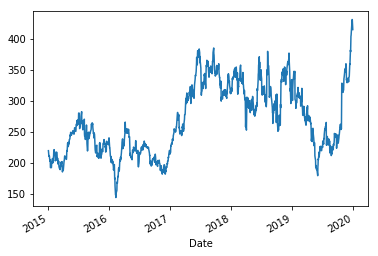

In [117]:
ap["Close"].plot();

In [114]:
ap["Close"].index #yinede zaman degişkeni oldugunu izah edeliim

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [115]:
ap["Close"].index = pd.DatetimeIndex(ap["Close"].index)

In [116]:
ap["Close"].head(10)

Date
2015-01-02    219.309998
2015-01-05    210.089996
2015-01-06    211.279999
2015-01-07    210.949997
2015-01-08    210.619995
2015-01-09    206.660004
2015-01-12    202.210007
2015-01-13    204.250000
2015-01-14    192.690002
2015-01-15    191.869995
Name: Close, dtype: float64

In [122]:
ap.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object